In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../RealEstateTracker/data/flats_data.csv")

In [3]:
data = data.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "elevator", "heating", "floor"])

In [4]:
data["tipo"] = data["neighborhood"].apply(lambda x: x.split(" en ")[0])

In [5]:
data["neighborhood"] = data["neighborhood"].apply(lambda x: x.split(" en ")[-1])

In [6]:
data["neighborhood"] = data["neighborhood"].apply(lambda x: x.split(",")[-1]).str.strip()

In [7]:
data["neighborhood"].unique()

array(['Chamberí', 'Retiro', 'Carabanchel', 'Villa de Vallecas', 'Centro',
       'Tetuán', 'Puente de Vallecas', 'Barrio de Salamanca', 'Chamartín',
       'Usera', 'Moncloa - Aravaca', 'Ciudad Lineal', 'Arganzuela',
       'Fuencarral - El Pardo', 'Villaverde', 'Latina', 'Moratalaz',
       'Vicálvaro', 'Barajas', 'Hortaleza', 'Madrid Capital', 'San Blas'],
      dtype=object)

In [8]:
data = data[data["price"].str.contains("€")]

In [9]:
data = data[~data["rooms"].fillna("0 hab").str.contains("ñ")]

In [10]:
data = data[~data["rooms"].fillna("0 hab").str.contains("m²")]

In [11]:
data = data[~data.surface.isna()]

In [12]:
data = data.dropna()

In [13]:
data["price"] = pd.to_numeric(data["price"].str[:-2].str.replace(".", ""))

In [14]:
data["rooms"] = pd.to_numeric(data["rooms"].str[:2])

In [15]:
data = data[(0 <= data["rooms"]) & (18 >= data["rooms"])]

In [16]:
data = data[data.surface.str.contains("m²")]

In [17]:
data["surface"] = pd.to_numeric(data.surface.str[:-3])

In [18]:
data = data.drop_duplicates()

In [19]:
data

,price,rooms,surface,neighborhood,tipo
0,566500,2,87,Chamberí,Piso
1,310500,3,78,Retiro,Piso
2,220000,4,103,Carabanchel,Piso
3,171000,2,81,Villa de Vallecas,Piso
4,369000,3,83,Centro,Piso
...,...,...,...,...,...
6855,515000,4,106,Centro,Piso
6856,280000,3,99,San Blas,Piso
6857,182100,1,52,Villaverde,Ático
6858,220000,1,42,Centro,Ático


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/lucas/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighborhood', ylabel='surface'>

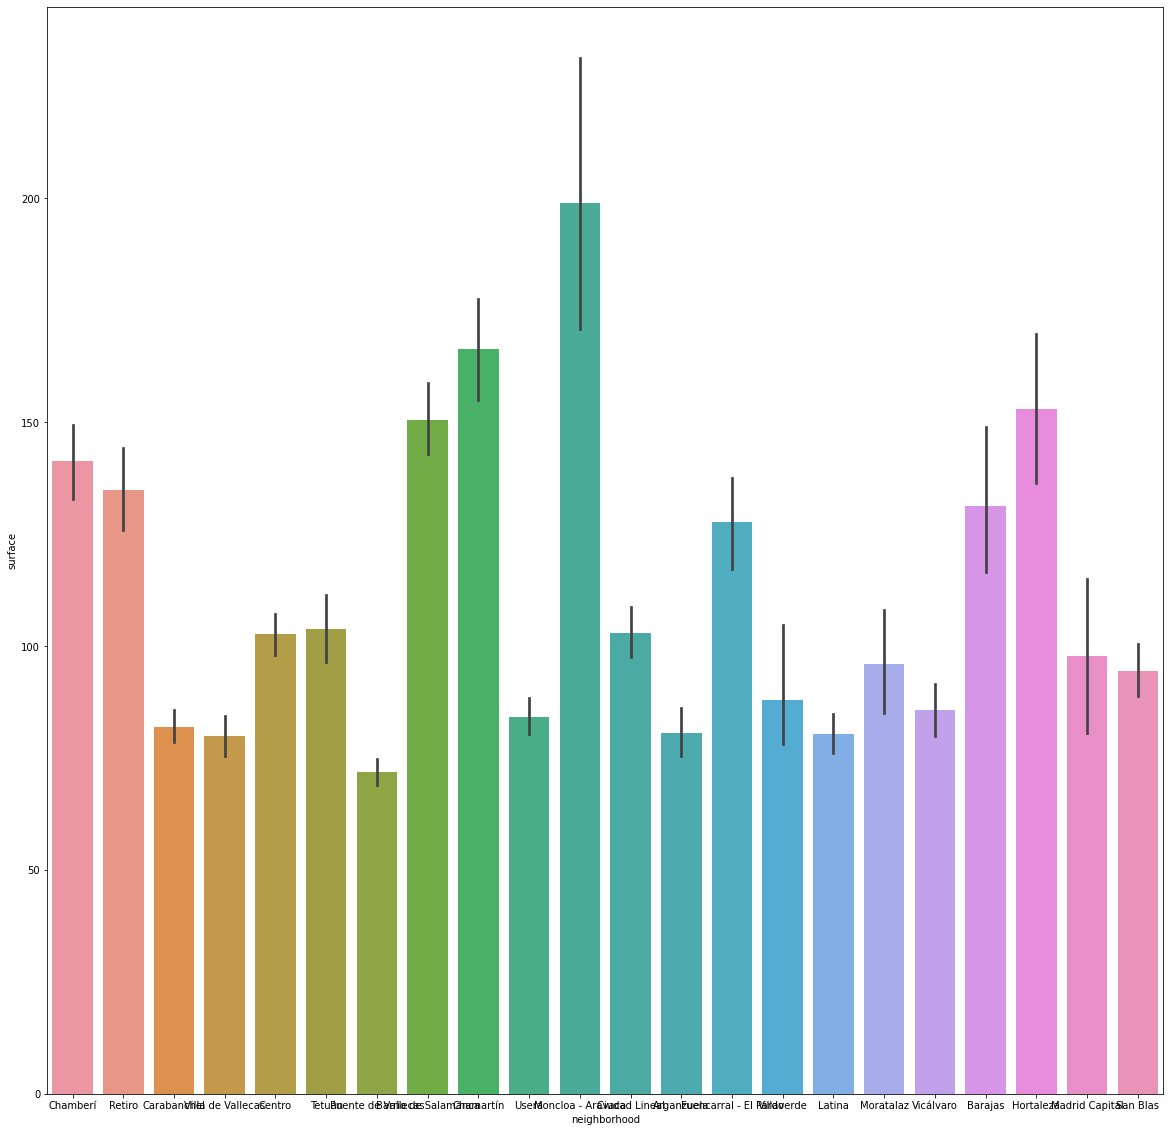

In [21]:
plt.figure(figsize=(20,20))
sns.barplot(data["neighborhood"], data["surface"])

In [22]:
data

,price,rooms,surface,neighborhood,tipo
0,566500,2,87,Chamberí,Piso
1,310500,3,78,Retiro,Piso
2,220000,4,103,Carabanchel,Piso
3,171000,2,81,Villa de Vallecas,Piso
4,369000,3,83,Centro,Piso
...,...,...,...,...,...
6855,515000,4,106,Centro,Piso
6856,280000,3,99,San Blas,Piso
6857,182100,1,52,Villaverde,Ático
6858,220000,1,42,Centro,Ático


In [23]:
data.to_csv("clean_data.csv")

In [24]:
X = data.drop(columns="price")

In [25]:
y = data["price"]

In [26]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression


In [27]:
from sklearn.metrics import make_scorer, mean_squared_log_error
rmsle_neg = make_scorer(mean_squared_log_error, squared= False, greater_is_better = False)
rmsle = make_scorer(mean_squared_log_error, squared=False)

In [28]:
scaler = RobustScaler()
encoder = OneHotEncoder(sparse= False, handle_unknown= "ignore")

In [29]:
preproc = make_column_transformer((scaler, ["rooms", "surface"]),
                                (encoder, ["neighborhood", "tipo"]))

In [31]:
new_1 = preproc.fit_transform(X)

In [32]:
model = LinearRegression()

In [33]:
model.fit(new_1, y)

LinearRegression()

In [30]:
import sklearn
sklearn.__version__

'1.0.2'

In [34]:
cross_validate(model, new_1, y, scoring=rmsle)

/Users/lucas/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/lucas/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/lucas/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/lucas/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/lucas/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_regression.py", line 521, in mean_squared_log_error
    raise V

{'fit_time': array([0.04196501, 0.0291357 , 0.02050686, 0.02072215, 0.02082419]),
 'score_time': array([0.00282407, 0.00054622, 0.00056911, 0.0004518 , 0.00037503]),
 'test_score': array([nan, nan, nan, nan, nan])}